In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",100)
import scipy as sp
from langdetect import detect
from textblob import TextBlob , Word
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter('ignore') #uyarıları görmemek için.
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB #binary ise evet- hayır, 1-0
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #pozitif, negatif, nötr ise 

vect=CountVectorizer()
nb=MultinomialNB()

r = RandomForestClassifier()
gbc = GradientBoostingClassifier()
d = DecisionTreeClassifier()
log = LogisticRegression()
k = KNeighborsClassifier()
g = GaussianNB()
b = BernoulliNB()
xgbc = XGBClassifier()

### NLP Projesi Adımları
- 1-Bütün cümleler küçük harfe çevirilir
- 2-Noktalama işaretleri kaldırılır.
- 3-Rakamları kaldır.
- 4-Satır sonu,\n enter a basılmışsa \r
- 5-stop words(gereksiz kelimeler) leri kaldır.
- 6-Tokenize işlemi yapıyoruz. (Kelimeleri metrix haline çevirme)
- 7-Lemma ve stemma uygula(ekleri kaldırıp kökleri buluyoruz)
- 8-vectorizer ile yazıları rakama atıyoruz(dummie_variables gibi)

In [2]:
df = pd.read_csv("restaurant.csv")
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [4]:
df.stars.value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [5]:
plt.style.use("ggplot")

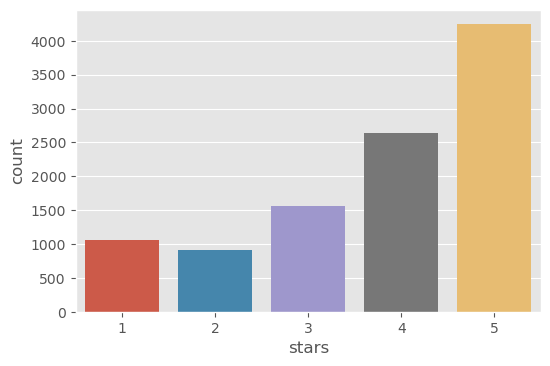

In [6]:
plt.figure(figsize = (6,4),dpi = 100)
sns.countplot(df.stars);

In [7]:
df["year"]=pd.DatetimeIndex(df["date"]).year

In [8]:
df2=pd.DataFrame(df.groupby("year").stars.mean())

<AxesSubplot:xlabel='year', ylabel='stars'>

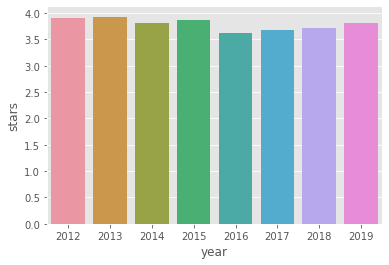

In [9]:
sns.barplot(df2.index,df2.stars)

In [10]:
#sentiment sütunu oluşturduk. 
df.loc[df["stars"] ==3, "sentiment"] = "neutral"
df.loc[df["stars"] < 3, "sentiment"] = "negative"
df.loc[df["stars"] > 3, "sentiment"] = "positive"
df= df[["stars","sentiment","text"]]

In [11]:
df.head()

,stars,sentiment,text
0,5,positive,After getting food poisoning at the Palms hote...
1,4,positive,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,positive,The crab legs are better than the ones at Wick...
3,1,negative,Not worth it! Too salty food and expensive! Th...
4,5,positive,I would give this infinite stars if I could. M...


In [12]:
df.sentiment.value_counts(normalize=True)[2]
#negatif olanların yüzdesi

0.14985120476144764

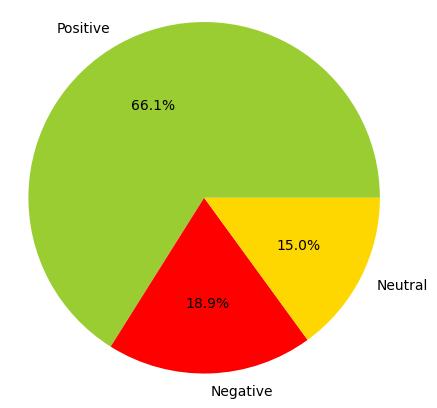

In [13]:
pie_sentiment = df.sentiment.value_counts(normalize=True)
plt.figure(figsize = (5,5),dpi =100)
labels = "Positive","Negative", "Neutral"
colors = ["yellowgreen","red","gold"]
plt.pie(pie_sentiment,colors=colors,labels=labels,autopct="%1.1f%%")
plt.axis("equal");

In [14]:
df['text']=df['text'].str.lower().str.replace('[^\w\s]','').str.replace('\d+','').str.replace('\n',' ').replace('\r','')

In [15]:
df["language"] = df["text"].apply(detect) #yeni bir sütun açtık ve hangi dil olduğunu bulduk

In [16]:
df[df["language"]=="ja"].head()

,stars,sentiment,text,language
1548,5,positive,高いけど メチャ美味しいし 品揃えも豊富で お料理一品一品の見た目もとても綺麗です 特に茹で...,ja
7226,2,negative,料理の種類は多いけど料理それぞれがやや雑な印象カニは殻が割り切れてなく食べにくい肉は焼き方が...,ja
9645,5,positive,ラスベガスに行ったらバッフェに 少しお値段高めですがこちらは種類の多さ美味しさどれも良かった...,ja
9799,4,positive,ラスベガスで一番美味しいと言われている バフェですランチで行ってきました 種類が本当に豊富で...,ja
10044,2,negative,ビュッフェスタイルのレストラン夜に分ほど並んでの入店です 店内は非常に広くその広さを活かし...,ja


In [17]:
df.shape

(10417, 4)

In [18]:
df =df[df["language"]=="en"] #sadece İngilizce olanları al ve df'e eşitle.

In [19]:
df.shape

(10375, 4)

In [20]:
df[df["language"]=="en"].head()

,stars,sentiment,text,language
0,5,positive,after getting food poisoning at the palms hote...,en
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en
2,4,positive,the crab legs are better than the ones at wick...,en
3,1,negative,not worth it too salty food and expensive this...,en
4,5,positive,i would give this infinite stars if i could my...,en


In [21]:
df.sentiment.value_counts()

positive    6854
negative    1964
neutral     1557
Name: sentiment, dtype: int64

In [22]:
df.sentiment.value_counts(normalize=True)

positive    0.660627
negative    0.189301
neutral     0.150072
Name: sentiment, dtype: float64

In [23]:
df[["polarity","subjectivity"]] = df["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
#yıldızına bakmadan pozitif mi negatif mi konuştuğunu veriyor. 

In [24]:
df.shape

(10375, 6)

In [54]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white",
                   mask = mask,
                   max_words = 25000,
                   stopwords = stopwords,
                   
                   width=500,
                   contour_color="green",
                   contour_width=5)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


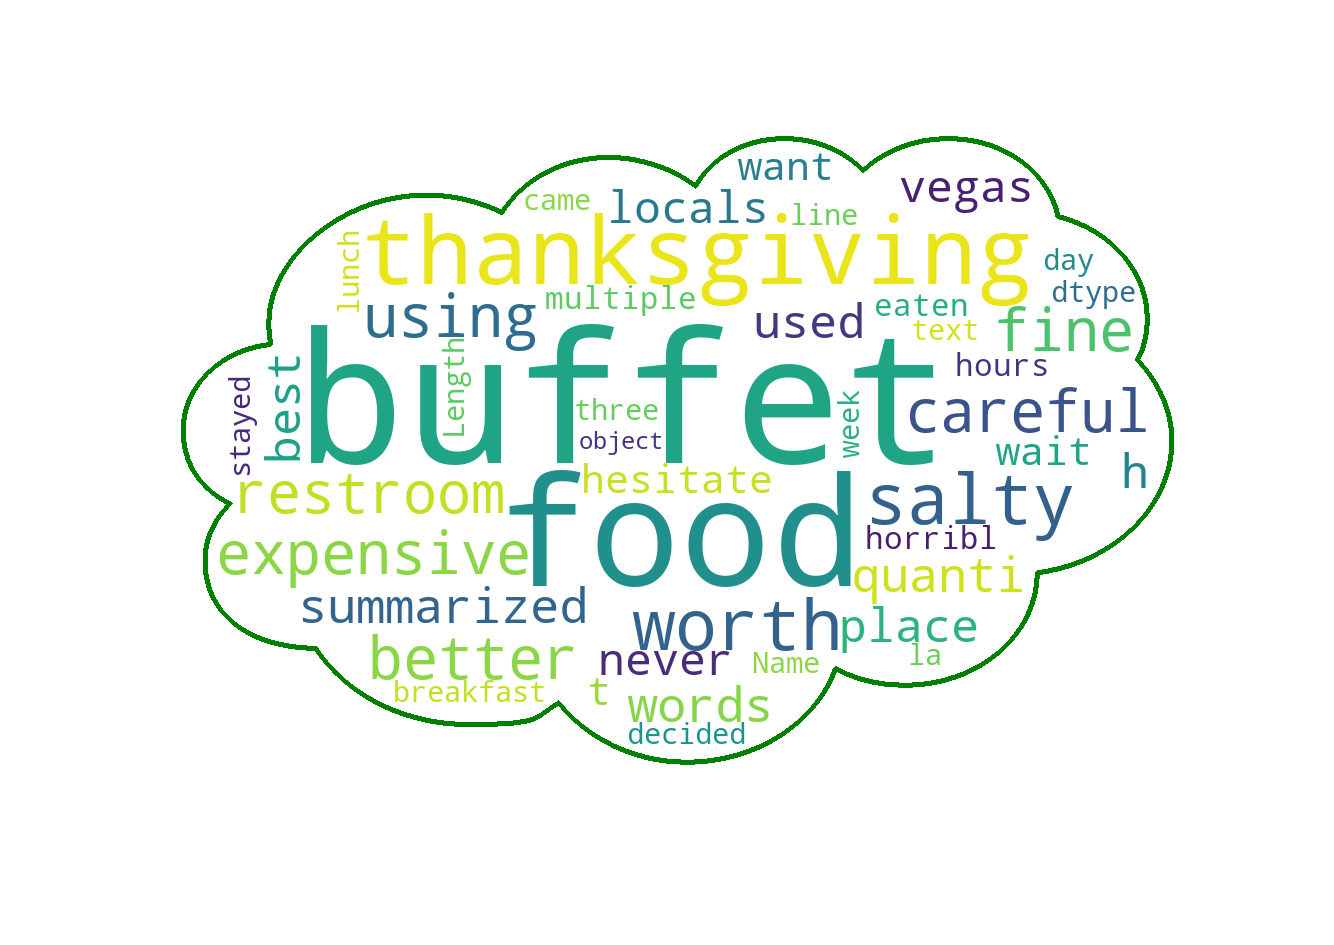

In [55]:
text1=df[df["stars"]==1]
create_wordcloud(text1.text)

In [ ]:
text5 = df[df["stars"]==5]
create_wordcloud(text5.text)

In [ ]:
#.reset_index(drop=True,inplace=True) 
#indexleri sıfırlayı yeniden indexleme yapar.

In [ ]:
x = df.text
y = df.sentiment

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state =42)

In [ ]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

In [ ]:
print(x_train)

### Tokenization - Vektör haline çevirme

In [ ]:
vect = CountVectorizer (stop_words='english')
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm =vect.transform(x_test)
print(x_train_v)

In [ ]:
print(x_test)

In [ ]:
x_train_dtm.shape ,x_test_dtm.shape 

In [ ]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.head()

In [ ]:
vect=CountVectorizer(ngram_range=(1,2)) #bir kelimenin öncesini ve sonrasini bir arada değerlendiriyor 
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape

In [ ]:
print(x_test)

In [ ]:
x_train_dtm =vect.fit_transform(x_train) #veriyi alır ve vektröre çevirerek transform eder. 
x_test_dtm =vect.transform(x_test)

In [ ]:
nb.fit(x_train_dtm,y_train)

In [ ]:
y_pred_class =nb.predict(x_test_dtm)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred_class))

In [ ]:
#ngram 'ı 1,2 ye ayırdığım doğru mu olmuş buna fonsksiyon ile bakıyorum

#define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print ('Features: ', x_train_dtm.shape[1])
    #
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    #
    print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
#include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

In [ ]:
#include only 1-grams 
vect=CountVectorizer()
tokenize_test(vect)

#başarı oranım öncekine göre yüksek çıktı.tek kelime yapmak daha mantıklı. 

In [ ]:
vect=CountVectorizer() #bir kelimenin öncesini ve sonrasini bir arada değerlendiriyor 
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape

In [ ]:
#Stop wordleri kaldırıp başarı oranımı bakıyorum.
vect=CountVectorizer(stop_words='english')
tokenize_test(vect)

In [ ]:
#max_features en meşhur 100 sütun alarak başarı oranıma bakıyorum

vect=CountVectorizer(stop_words='english' , max_features=100)
tokenize_test(vect)

In [ ]:
review =TextBlob(df.text[0])

In [ ]:
review.words 
#bir yorumda geçen bütün kelimeler

In [ ]:
review.sentences
#bir yorumda geçen bütün cümleler
#noktalama işaretleri olmadığı için tek cümle olarak aldı

In [ ]:
review.lower()

In [ ]:
#ekleri kaldırır
stemmer = SnowballStemmer("english")
print([stemmer.stem(word) for word in review.words])

In [ ]:
#kökleri kaldırır
print([word.lemmatize() for word in review.words])

In [ ]:
#sadece fiil olanların köklerini bulma 
print([word.lemmatize(pos="v") for word in review.words])

In [ ]:
def split_into_lemmas(text):
    #text = unicode(text, 'utf-8').lower() #Python 2
    text = str(text).lower() #Python 3
    words = TextBlob(text).words
    #return [word.lemmatize() for word in words]
    return [stemmer.stem(word) for word in words]

In [ ]:
#ekleri atıp kökleri bulduktan sonra başarı oranıma bakıyorum
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

## TF-IDF

In [ ]:
#create a document-term matrix using TF-ID
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(df.text)
features = vect.get_feature_names()
dtm.shape

In [ ]:
def summarize():
    
    #choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(df))
        #review_text = unicode(df.text[review_id], 'utf-8') #Python 2
        review_text = str(df.text[review_id]) #Python3
        review_length = len(review_text)
        
    #create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
            
    #print words with the top 5 TF-IDF scores
    print ('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print (word)
        
    #print the review
    print ('\n' + review_text) 

In [ ]:
summarize()
#en fazla tekrar eden kelimeler

## Sentimen Analysis